In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load data
x_test = np.load('x_test.npy')
x_train = np.load('x_train.npy')
y_test = np.load('y_test.npy')
y_train = np.load('y_train.npy')

# Len
print('View each arrs len:', len(x_test), len(x_train), len(y_test), len(y_train))

View each arrs len: 100 100 100 100


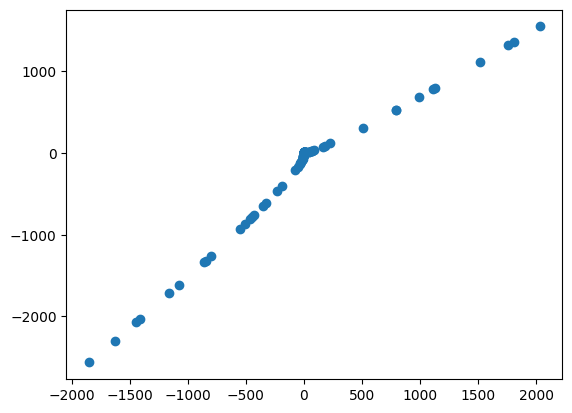

In [21]:
# Scatter train for x and y and view to find relationship
plt.scatter(x_train**7, y_train)
plt.show()

In [30]:
def create_polynomial_features(x, degree=7):
    X = np.ones((len(x), degree + 1))
    for i in range(1, degree + 1):
        X[:, i] = x ** i
    return X

def predict(X, weights):
    # X is the feature matrix
    # weights is an arr of 8 weights
    # outputs predictions of Y (100 preds)
    return X @ weights

def cost_function(y_true, y_pred):
    # y_true is the actual 100 y vals
    # y_pred is the predicted 100 y vals
    # outputs cost which is a number measuring total err
    m=len(y_true)
    errors = y_pred - y_true
    squared_err = errors ** 2
    cost = (1 / (2 * m)) * np.sum(squared_err)
    return cost

In [31]:
# Create train and test features for X
x_train_features = create_polynomial_features(x_train, degree=7)
x_test_features = create_polynomial_features(x_test, degree=7)

# Initialize vars
weights = np.zeros(8)

y_pred = predict(x_train_features, weights)
cost = cost_function(y_train, y_pred)
print(cost)

100
226280.88650225292
